<a href="https://colab.research.google.com/github/sjkchang/CMPE255-Assignment-2/blob/master/notebooks/Assignment2_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
!pip install pycaret
!pip install pycaret[mlops]

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets
 3D-Print-Anomoly-Detection/
 Amazon-stock-time-series.csv
 CarPrice_Assignment.csv
'Credit Card Customer Data - Clustering.csv'
 falling-elders-anomoly-detection/
 flagged/
 Groceries_dataset-association-rules-mining.csv
 heartattack.csv
 logs.log
 my_first_pipeline.pkl
 secondhand-car-price-regression.csv


# Second Hand Car Price - Regression


In [3]:
from pycaret.datasets import get_data
data = get_data('CarPrice_Assignment')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Convert Columns into categorical values

In [4]:
data[['make', 'model']] = data['CarName'].str.split(' ', n=1, expand=True)
data = data.drop(columns=['car_ID', 'CarName'])
data["make"] = data["make"].astype('category')
data["model"] = data["model"].astype('category')
data["fueltype"] = data["fueltype"].astype('category')
data["fueltype"] = data["fueltype"].astype('category')
data["aspiration"] = data["aspiration"].astype('category')
data["doornumber"] = data["doornumber"].astype('category')
data['carbody'] = data['carbody'].astype('category')
data['drivewheel'] = data['drivewheel'].astype('category')
data['enginelocation'] = data['enginelocation'].astype('category')

data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,make,model
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,145e (sw)
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,144ea
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,244dl
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,246


In [5]:
from pycaret.regression import *
car_reg = setup(data, target = 'price', session_id=999, remove_multicollinearity=True, multicollinearity_threshold=0.9, use_gpu=True)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Description,Value
0,Session id,999
1,Target,price
2,Target type,Regression
3,Original data shape,"(205, 26)"
4,Transformed data shape,"(205, 46)"
5,Transformed train set shape,"(143, 46)"
6,Transformed test set shape,"(62, 46)"
7,Ordinal features,4
8,Numeric features,14
9,Categorical features,11


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

In [6]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,2774.2216,16391891.6428,3703.2472,0.7315,0.2564,0.2108,0.5250
lightgbm,Light Gradient Boosting Machine,3047.2448,20217988.6717,4139.3130,0.6710,0.2722,0.2423,0.4540
et,Extra Trees Regressor,3176.9662,26592742.5327,4738.6043,0.5965,0.2650,0.2219,0.8260
knn,K Neighbors Regressor,3285.9909,30061248.5250,5017.8017,0.5367,0.2825,0.2315,0.4170
lr,Linear Regression,3710.9124,26550077.3228,4953.6747,0.5359,0.3352,0.3139,0.8660
lasso,Lasso Regression,3818.9953,28282124.9345,5109.1337,0.5092,0.3426,0.3217,0.5960
llar,Lasso Least Angle Regression,3958.7266,30582918.2397,5314.8941,0.4683,0.3537,0.3317,0.6920
ridge,Ridge Regression,4160.9772,34583698.4286,5670.8888,0.3978,0.3723,0.3474,0.6500
ada,AdaBoost Regressor,3533.9088,41708465.8757,6045.4595,0.3536,0.3112,0.2198,0.9390
gbr,Gradient Boosting Regressor,3857.1484,44713354.5918,6278.6462,0.2999,0.3444,0.2592,0.6800


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

# Analyze Model


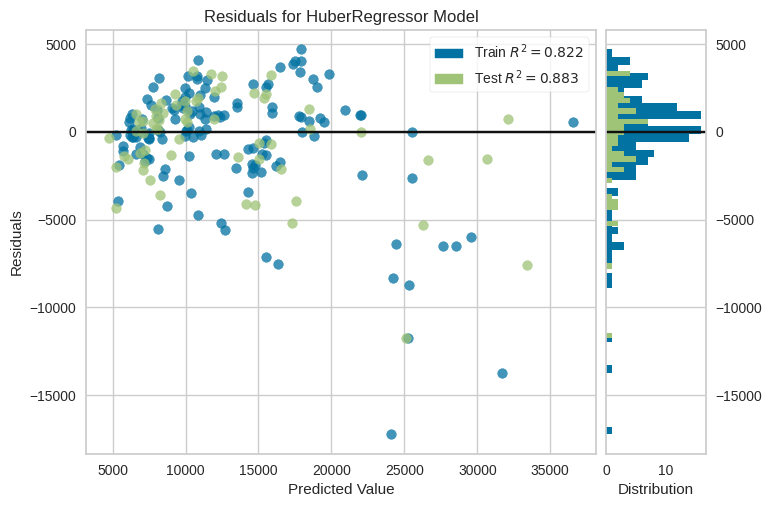

In [7]:
# plot residuals
plot_model(best, plot = 'residuals')

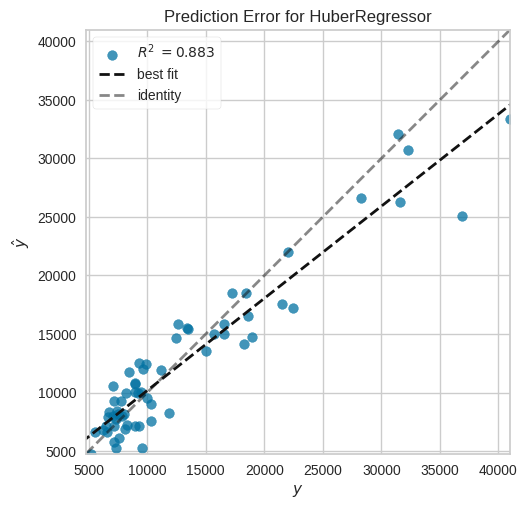

In [8]:
# plot residuals
plot_model(best, plot = 'error')

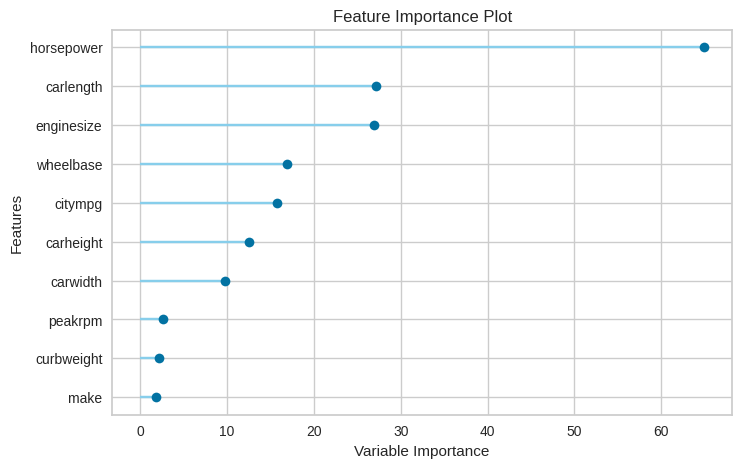

In [9]:
# plot feature importance
plot_model(best, plot = 'feature')

# Prediction

In [10]:
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,1985.1265,7663274.5070,2768.2620,0.8832,0.1997,0.1611


In [11]:
holdout_pred.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,make,model,price,prediction_label
109,0,gas,std,four,wagon,rwd,front,114.199997,198.899994,68.400002,...,3.19,8.4,97,5000,19,24,peugeot,504 (sw),12440.0,14672.632533
40,0,gas,std,four,sedan,fwd,front,96.500000,175.399994,62.500000,...,3.58,9.0,86,5800,27,33,honda,accord,10295.0,7565.077947
197,-1,gas,std,four,wagon,rwd,front,104.300003,188.800003,67.199997,...,3.15,9.5,114,5400,24,28,volvo,245,16515.0,15833.356741
68,-1,diesel,turbo,four,wagon,rwd,front,110.000000,190.899994,70.300003,...,3.64,21.5,123,4350,22,25,buick,century luxus (sw),28248.0,26637.472729
157,0,gas,std,four,hatchback,fwd,front,95.699997,166.300003,64.400002,...,3.03,9.0,70,4800,30,37,toyota,corolla 1200,7198.0,7111.570055
